In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.model_selection import cross_val_score, KFold
import xgboost as xgb

# TRAIN

In [2]:
for i in range(45):
    if i==0:
        train = pd.read_csv('salida/resultados/SICK/TRAIN_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/TRAIN_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [7]:
train["CLASS"].unique()

array(['CONTRADICTION', 'ENTAILMENT'], dtype=object)

<Axes: title={'center': 'relaciones'}, xlabel='CLASS'>

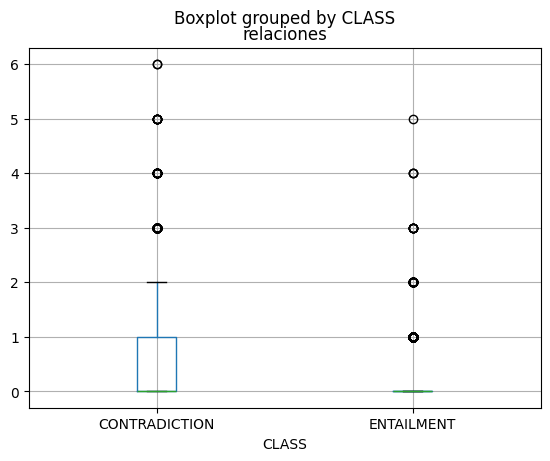

In [4]:
train.boxplot(by="CLASS",column=["relaciones"])

<Axes: title={'center': 'sim_faltantes'}, xlabel='CLASS'>

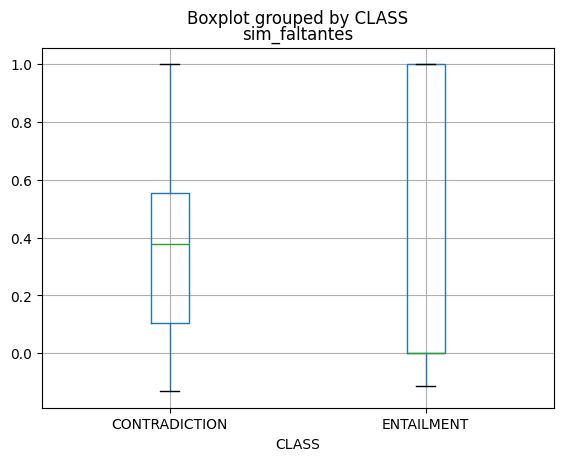

In [5]:
train.boxplot(by="CLASS",column=["sim_faltantes"])

In [6]:
train=train.drop(["entropias","antonimos"],axis=1)
train

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000000,0.000000,0.000000,1,1.000000,CONTRADICTION
1,0.114918,100.71223,1.711384,0.369471,0.114918,1,0.114918,CONTRADICTION
2,0.000000,0.00000,0.000000,0.000000,0.000000,1,1.000000,ENTAILMENT
3,1.064229,380.85742,18.322292,4.431219,0.195273,0,0.177042,CONTRADICTION
4,2.867368,241.05775,20.902023,4.989589,0.332594,2,0.471261,CONTRADICTION
...,...,...,...,...,...,...,...,...
34,0.924950,391.77950,18.350202,4.146894,0.135612,0,0.177094,CONTRADICTION
35,2.549616,343.11250,29.332251,5.025132,0.363223,0,0.407879,CONTRADICTION
36,3.173033,369.60180,34.950960,6.838347,0.257784,1,0.398060,CONTRADICTION
37,1.804459,204.06305,14.874765,3.171687,0.401213,0,0.369778,CONTRADICTION


In [55]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [56]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    else:
        y_train.append(0)

In [57]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

# DEV

In [58]:
for i in range(5):
    if i==0:
        dev = pd.read_csv('salida/resultados/SICK/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/DEV_'+str(i+1)+'.csv.csv')
        dev=pd.concat([dev,temp])

In [59]:
dev=dev.drop(["entropias","antonimos"],axis=1)
dev

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,1.074424,127.826540,6.906301,1.720222,0.278522,0,0.352328,CONTRADICTION
1,2.011933,193.265750,15.422091,2.632271,0.296344,2,0.458316,CONTRADICTION
2,0.378545,60.185406,1.897469,0.247676,0.378545,1,0.378546,CONTRADICTION
3,1.660813,270.395660,7.607406,1.297392,0.415203,2,0.538831,CONTRADICTION
4,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.000000,CONTRADICTION
...,...,...,...,...,...,...,...,...
90,0.986909,156.993200,10.616691,2.130698,0.199834,1,0.287339,CONTRADICTION
91,0.302330,73.981760,3.260589,0.495572,0.404658,0,0.260126,CONTRADICTION
92,1.608502,277.959170,21.247575,3.813996,0.197763,0,0.246701,CONTRADICTION
93,0.595234,170.758440,6.351086,1.874976,0.205298,2,0.162272,CONTRADICTION


In [60]:
X_dev = np.array(dev.drop(['CLASS'],axis=1))
y_d = np.array(dev['CLASS'])

In [61]:
# SICK
y_dev=[]
for i in y_d:
    if i == "ENTAILMENT":
        y_dev.append(1)
    else:
        y_dev.append(0)

In [62]:
scaler = preprocessing.StandardScaler().fit(X_dev)
X_scaled = scaler.transform(X_dev)
X_dev = X_scaled

# TEST

In [63]:
for i in range(50):
    if i==0:
        test = pd.read_csv('salida/resultados/SICK/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/SICK/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [64]:
test=test.drop(["entropias","antonimos"],axis=1)
test

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,4.966659,348.627660,34.533986,7.224745,0.313013,1,0.428688,CONTRADICTION
1,3.762295,322.391720,28.020195,6.795347,0.368469,0,0.487296,CONTRADICTION
2,4.527484,188.073120,26.025844,5.007468,0.459162,1,0.580983,CONTRADICTION
3,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.000000,ENTAILMENT
4,0.473630,45.112247,1.714587,0.262647,0.473630,0,0.473630,CONTRADICTION
...,...,...,...,...,...,...,...,...
1,2.238598,195.129700,22.072410,2.996832,0.368855,1,0.342264,CONTRADICTION
2,0.748086,172.961210,10.085201,3.234199,0.248313,1,0.210610,CONTRADICTION
3,0.536706,162.101380,5.211209,0.640615,0.178902,3,0.212080,CONTRADICTION
4,8.014608,545.806150,62.260364,12.531210,0.420467,2,0.568003,CONTRADICTION


In [65]:
test.describe()

,suma,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes
count,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000
mean,0.738225,83.499900,5.436503,1.030016,0.188971,0.486139,0.392139
std,1.210427,119.998900,9.356286,1.973476,0.217283,0.777035,0.359299
min,-0.160007,0.000000,0.000000,0.000000,-0.110817,0.000000,-0.119275
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.061815,32.159098,1.652070,0.115776,0.053574,0.000000,0.364912
75%,0.987637,133.197770,7.013622,1.234711,0.362464,1.000000,0.586562
max,9.202276,1030.444500,70.436295,27.545279,1.000000,5.000000,1.000000


In [66]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [67]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [68]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO

In [69]:
# X_train = np.nan_to_num(X_train)
# X_test = np.nan_to_num(X_test)

In [70]:
clf_xgb = xgb.XGBClassifier(objective='reg:logistic',n_estimators=3000,device="cuda")
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3000, n_jobs=None,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [71]:
preds_xgb_d = clf_xgb.predict(X_dev)

In [72]:
print("acccuracy: ",round(accuracy_score(y_dev,preds_xgb_d),2))
print("precision: ",round(precision_score(y_dev,preds_xgb_d),2))
print("recall",round(recall_score(y_dev,preds_xgb_d),2))
print("f1_score: ",round(f1_score(y_dev,preds_xgb_d),2))
print("matthews_score: ",round(matthews_corrcoef(y_dev,preds_xgb_d),2))

acccuracy:  0.72
precision:  0.52
recall 0.68
f1_score:  0.59
matthews_score:  0.39


In [73]:
preds_xgb = clf_xgb.predict(X_test)

In [74]:
print("acccuracy: ",round(accuracy_score(y_test,preds_xgb),2))
print("precision: ",round(precision_score(y_test,preds_xgb),2))
print("recall",round(recall_score(y_test,preds_xgb),2))
print("f1_score: ",round(f1_score(y_test,preds_xgb),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,preds_xgb),2))

acccuracy:  0.74
precision:  0.53
recall 0.67
f1_score:  0.59
matthews_score:  0.41


In [75]:
clf_lr = LR().fit(X_train, y_train)

In [76]:
accuracy_xgb = float(np.sum(preds_xgb == np.array(y_test)))/len(np.array(y_test))
print('Accuracy de XGBoost: ', accuracy_xgb)
accuracy_lr = clf_lr.score(X_test, y_test)
print('Accuracy de Logistic Regression: ', accuracy_lr)

Accuracy de XGBoost:  0.7372604973501834
Accuracy de Logistic Regression:  0.7490827558092132


In [77]:
confusion_matrix(y_test, preds_xgb)

array([[2672,  830],
       [ 459,  945]])

In [78]:
scores = cross_val_score(clf_xgb, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.74


In [79]:
kfold = KFold(n_splits=20, shuffle=True)
kf_cv_scores = cross_val_score(clf_xgb, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.74
